In [7]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import StratifiedKFold
import random

In [8]:
# Python optimisation variables
learning_rate = 0.0001
epochs = 500
dropout_rate = 0.15


In [9]:
filename = '/Users/vinitaboolchandani/surrogate_data/data4ML/surrogate/confined_ions/data/jcs_paper_data.dat'

In [10]:
#data load
contents = open(filename).read().splitlines()
contents = contents[1:]
random.shuffle(contents)
input_params=[]
output_density=[]
pos_val=[]
error_bars = []
for line in range(1, len(contents)):
            line_arr = contents[line].split(",")
            input_params.append(list(map(float, line_arr[0:5])))
            pos_val.append(list(map(float, line_arr[5:155])))
            output_density.append(list(map(float, line_arr[155:305])))
            error_bars.append(list(map(float, line_arr[305:455])))
train_input,test_input=input_params[0:2432],input_params[2432:]
train_gt,test_gt=output_density[0:2432],output_density[2432:]


In [11]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(5,), kernel_initializer=keras.initializers.glorot_normal(seed=None), kernel_constraint=maxnorm(3), activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(256, kernel_initializer=keras.initializers.glorot_normal(seed=None), kernel_constraint=maxnorm(3), activation="relu"),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(150, kernel_initializer=keras.initializers.glorot_normal(seed=None),activation="linear")
])

In [12]:
#Stochastic GD
sgd = SGD(lr=0.01, momentum=0.9)

In [13]:
#Compile the model
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['accuracy'])

In [14]:
#skf = StratifiedKFold(n_splits=100, random_state=None, shuffle=False)
#for train_index, test_index in skf.split(np.array(input_params), np.array(output_density)):
#    print("TRAIN:", train_index, "TEST:", test_index)

In [15]:
model.fit(train_input, train_gt, validation_data=(test_input, test_gt), batch_size=25, epochs = 500)


Train on 2432 samples, validate on 999 samples
Epoch 1/500
2432/2432 [==============================] - 1s 346us/sample - loss: 0.0392 - accuracy: 0.0535 - val_loss: 0.0097 - val_accuracy: 0.1632
Epoch 2/500
2432/2432 [==============================] - 0s 125us/sample - loss: 0.0068 - accuracy: 0.1028 - val_loss: 0.0017 - val_accuracy: 0.1882
Epoch 3/500
2432/2432 [==============================] - 0s 129us/sample - loss: 0.0047 - accuracy: 0.1044 - val_loss: 0.0026 - val_accuracy: 0.2973
Epoch 4/500
2432/2432 [==============================] - 0s 121us/sample - loss: 0.0037 - accuracy: 0.1357 - val_loss: 0.0013 - val_accuracy: 0.3383
Epoch 5/500
2432/2432 [==============================] - 0s 120us/sample - loss: 0.0032 - accuracy: 0.1299 - val_loss: 0.0015 - val_accuracy: 0.3393
Epoch 6/500
2432/2432 [==============================] - 0s 118us/sample - loss: 0.0027 - accuracy: 0.1435 - val_loss: 9.3406e-04 - val_accuracy: 0.2983
Epoch 7/500
2432/2432 [==============================] 

2432/2432 [==============================] - 0s 127us/sample - loss: 6.2331e-04 - accuracy: 0.2924 - val_loss: 1.6087e-04 - val_accuracy: 0.4164
Epoch 54/500
2432/2432 [==============================] - 0s 136us/sample - loss: 6.2687e-04 - accuracy: 0.2915 - val_loss: 2.3868e-04 - val_accuracy: 0.4104
Epoch 55/500
2432/2432 [==============================] - 0s 132us/sample - loss: 6.4879e-04 - accuracy: 0.2944 - val_loss: 3.3782e-04 - val_accuracy: 0.3894
Epoch 56/500
2432/2432 [==============================] - 0s 126us/sample - loss: 6.1985e-04 - accuracy: 0.3154 - val_loss: 3.4375e-04 - val_accuracy: 0.4164
Epoch 57/500
2432/2432 [==============================] - 0s 136us/sample - loss: 6.0694e-04 - accuracy: 0.3207 - val_loss: 2.2351e-04 - val_accuracy: 0.4194
Epoch 58/500
2432/2432 [==============================] - 0s 117us/sample - loss: 6.8523e-04 - accuracy: 0.3059 - val_loss: 4.6483e-04 - val_accuracy: 0.4284
Epoch 59/500
2432/2432 [==============================] - 0s 116u

2432/2432 [==============================] - 0s 80us/sample - loss: 5.2549e-04 - accuracy: 0.3980 - val_loss: 1.6761e-04 - val_accuracy: 0.4314
Epoch 106/500
2432/2432 [==============================] - 0s 77us/sample - loss: 5.1408e-04 - accuracy: 0.4132 - val_loss: 1.4286e-04 - val_accuracy: 0.4464
Epoch 107/500
2432/2432 [==============================] - 0s 75us/sample - loss: 5.6500e-04 - accuracy: 0.4145 - val_loss: 4.3592e-04 - val_accuracy: 0.4384
Epoch 108/500
2432/2432 [==============================] - 0s 77us/sample - loss: 5.7208e-04 - accuracy: 0.4100 - val_loss: 3.5547e-04 - val_accuracy: 0.4084
Epoch 109/500
2432/2432 [==============================] - 0s 78us/sample - loss: 5.7877e-04 - accuracy: 0.4116 - val_loss: 1.0490e-04 - val_accuracy: 0.4354
Epoch 110/500
2432/2432 [==============================] - 0s 77us/sample - loss: 5.3788e-04 - accuracy: 0.3988 - val_loss: 1.6910e-04 - val_accuracy: 0.4124
Epoch 111/500
2432/2432 [==============================] - 0s 76us

Epoch 157/500
2432/2432 [==============================] - 0s 77us/sample - loss: 5.1134e-04 - accuracy: 0.4046 - val_loss: 1.0319e-04 - val_accuracy: 0.4334
Epoch 158/500
2432/2432 [==============================] - 0s 75us/sample - loss: 5.8791e-04 - accuracy: 0.4194 - val_loss: 1.4841e-04 - val_accuracy: 0.4484
Epoch 159/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.7240e-04 - accuracy: 0.4165 - val_loss: 1.0696e-04 - val_accuracy: 0.4404
Epoch 160/500
2432/2432 [==============================] - 0s 76us/sample - loss: 4.6408e-04 - accuracy: 0.4206 - val_loss: 4.1163e-04 - val_accuracy: 0.4124
Epoch 161/500
2432/2432 [==============================] - 0s 84us/sample - loss: 4.9115e-04 - accuracy: 0.4038 - val_loss: 2.2670e-04 - val_accuracy: 0.4354
Epoch 162/500
2432/2432 [==============================] - 0s 82us/sample - loss: 5.0459e-04 - accuracy: 0.4190 - val_loss: 2.3221e-04 - val_accuracy: 0.4304
Epoch 163/500
2432/2432 [===========================

Epoch 209/500
2432/2432 [==============================] - 0s 85us/sample - loss: 5.1048e-04 - accuracy: 0.4157 - val_loss: 2.9036e-04 - val_accuracy: 0.4424
Epoch 210/500
2432/2432 [==============================] - 0s 77us/sample - loss: 5.1801e-04 - accuracy: 0.4206 - val_loss: 2.4720e-04 - val_accuracy: 0.4364
Epoch 211/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.9975e-04 - accuracy: 0.4326 - val_loss: 1.5722e-04 - val_accuracy: 0.4454
Epoch 212/500
2432/2432 [==============================] - 0s 76us/sample - loss: 4.7567e-04 - accuracy: 0.4128 - val_loss: 1.7763e-04 - val_accuracy: 0.4474
Epoch 213/500
2432/2432 [==============================] - 0s 80us/sample - loss: 5.0684e-04 - accuracy: 0.4124 - val_loss: 1.3866e-04 - val_accuracy: 0.4224
Epoch 214/500
2432/2432 [==============================] - 0s 83us/sample - loss: 5.7098e-04 - accuracy: 0.4178 - val_loss: 1.9557e-04 - val_accuracy: 0.4474
Epoch 215/500
2432/2432 [===========================

Epoch 261/500
2432/2432 [==============================] - 0s 72us/sample - loss: 4.7291e-04 - accuracy: 0.4165 - val_loss: 2.8530e-04 - val_accuracy: 0.4324
Epoch 262/500
2432/2432 [==============================] - 0s 72us/sample - loss: 4.5322e-04 - accuracy: 0.4243 - val_loss: 1.4402e-04 - val_accuracy: 0.4444
Epoch 263/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.8749e-04 - accuracy: 0.4104 - val_loss: 1.4478e-04 - val_accuracy: 0.4454
Epoch 264/500
2432/2432 [==============================] - 0s 93us/sample - loss: 5.2707e-04 - accuracy: 0.4206 - val_loss: 1.6161e-04 - val_accuracy: 0.4444
Epoch 265/500
2432/2432 [==============================] - 0s 90us/sample - loss: 4.7137e-04 - accuracy: 0.4165 - val_loss: 1.9172e-04 - val_accuracy: 0.4464
Epoch 266/500
2432/2432 [==============================] - 0s 71us/sample - loss: 4.5108e-04 - accuracy: 0.4248 - val_loss: 1.9618e-04 - val_accuracy: 0.4505
Epoch 267/500
2432/2432 [===========================

Epoch 313/500
2432/2432 [==============================] - 0s 75us/sample - loss: 5.0983e-04 - accuracy: 0.4169 - val_loss: 3.4995e-04 - val_accuracy: 0.4174
Epoch 314/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.9426e-04 - accuracy: 0.4186 - val_loss: 1.6334e-04 - val_accuracy: 0.4384
Epoch 315/500
2432/2432 [==============================] - 0s 74us/sample - loss: 5.2523e-04 - accuracy: 0.4161 - val_loss: 1.7830e-04 - val_accuracy: 0.4494
Epoch 316/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.6236e-04 - accuracy: 0.4252 - val_loss: 1.3670e-04 - val_accuracy: 0.4294
Epoch 317/500
2432/2432 [==============================] - 0s 73us/sample - loss: 4.7536e-04 - accuracy: 0.4280 - val_loss: 2.5743e-04 - val_accuracy: 0.4404
Epoch 318/500
2432/2432 [==============================] - 0s 74us/sample - loss: 5.0332e-04 - accuracy: 0.4038 - val_loss: 1.1548e-04 - val_accuracy: 0.4364
Epoch 319/500
2432/2432 [===========================

Epoch 365/500
2432/2432 [==============================] - 0s 73us/sample - loss: 4.7044e-04 - accuracy: 0.4219 - val_loss: 1.2794e-04 - val_accuracy: 0.4424
Epoch 366/500
2432/2432 [==============================] - 0s 73us/sample - loss: 4.7451e-04 - accuracy: 0.4190 - val_loss: 2.5283e-04 - val_accuracy: 0.4474
Epoch 367/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.4061e-04 - accuracy: 0.4186 - val_loss: 2.2102e-04 - val_accuracy: 0.4434
Epoch 368/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.6578e-04 - accuracy: 0.4174 - val_loss: 1.2843e-04 - val_accuracy: 0.4344
Epoch 369/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.9182e-04 - accuracy: 0.4289 - val_loss: 1.8243e-04 - val_accuracy: 0.4324
Epoch 370/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.9080e-04 - accuracy: 0.4186 - val_loss: 2.6207e-04 - val_accuracy: 0.4454
Epoch 371/500
2432/2432 [===========================

Epoch 417/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.6807e-04 - accuracy: 0.4182 - val_loss: 1.5819e-04 - val_accuracy: 0.4424
Epoch 418/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.7587e-04 - accuracy: 0.4083 - val_loss: 3.2835e-04 - val_accuracy: 0.4364
Epoch 419/500
2432/2432 [==============================] - 0s 74us/sample - loss: 5.2497e-04 - accuracy: 0.4137 - val_loss: 2.9538e-04 - val_accuracy: 0.4424
Epoch 420/500
2432/2432 [==============================] - 0s 73us/sample - loss: 4.4674e-04 - accuracy: 0.4190 - val_loss: 1.2537e-04 - val_accuracy: 0.4454
Epoch 421/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.9914e-04 - accuracy: 0.4219 - val_loss: 1.0219e-04 - val_accuracy: 0.4454
Epoch 422/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.7477e-04 - accuracy: 0.4141 - val_loss: 2.7472e-04 - val_accuracy: 0.4454
Epoch 423/500
2432/2432 [===========================

Epoch 469/500
2432/2432 [==============================] - 0s 76us/sample - loss: 4.6262e-04 - accuracy: 0.4178 - val_loss: 1.4406e-04 - val_accuracy: 0.4414
Epoch 470/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.7758e-04 - accuracy: 0.4178 - val_loss: 2.5944e-04 - val_accuracy: 0.4374
Epoch 471/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.5849e-04 - accuracy: 0.4141 - val_loss: 2.9258e-04 - val_accuracy: 0.4474
Epoch 472/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.6705e-04 - accuracy: 0.4165 - val_loss: 1.5696e-04 - val_accuracy: 0.4404
Epoch 473/500
2432/2432 [==============================] - 0s 75us/sample - loss: 4.5757e-04 - accuracy: 0.4198 - val_loss: 1.2715e-04 - val_accuracy: 0.4364
Epoch 474/500
2432/2432 [==============================] - 0s 74us/sample - loss: 4.9069e-04 - accuracy: 0.4235 - val_loss: 1.0840e-04 - val_accuracy: 0.4545
Epoch 475/500
2432/2432 [===========================

In [16]:
#prediction
prediction = model.predict(test_input)
#print(len(prediction),len(prediction[0]))
#print(len(pos_val[2432:]),len(pos_val[2432:][0]))

In [17]:
#Calculating peak densities
#Calculating peak densities
predicted_peaks = []
predicted_pos_peaks = []
gt_peaks = []
for i,ele in enumerate(prediction):
    ind = list(ele).index(max(ele))
    predicted_peaks.append(ele[ind])
    predicted_pos_peaks.append(pos_val[i][ind])
    gt_peaks.append(test_gt[i][ind])

plotting graphs


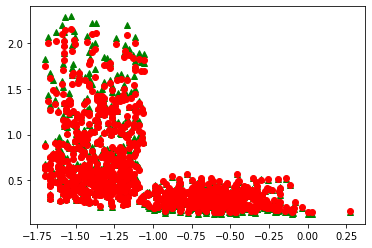

In [18]:
print("plotting graphs")
plt.plot(predicted_pos_peaks, gt_peaks,"g^")
plt.plot(predicted_pos_peaks, predicted_peaks,"ro")

In [183]:
print(predicted_peaks)

[0.0103484085, 0.010339567, 0.010338989, 0.01033394, 0.01033057, 0.010327797, 0.010327826, 0.010327876, 0.010361115, 0.010353686, 0.010353062, 0.010345585, 0.010341781, 0.010339909, 0.010339828, 0.010339986, 0.010367266, 0.010363344, 0.010363219, 0.010359, 0.010354526, 0.010352221, 0.0103520015, 0.0103521235, 0.010373548, 0.010370238, 0.010370138, 0.010367915, 0.01036616, 0.010364102, 0.010363449, 0.010362836, 0.0103791505, 0.010377092, 0.010376991, 0.010375054, 0.010372353, 0.010373089, 0.010373332, 0.0103742555, 0.010385696, 0.010383441, 0.010383258, 0.010380055, 0.010378283, 0.010381154, 0.010382646, 0.010385174, 0.010390962, 0.010387684, 0.010387499, 0.010386578, 0.010387562, 0.01038893, 0.010390395, 0.010394153, 0.010397943, 0.010395181, 0.010395056, 0.010394714, 0.010396696, 0.010398343, 0.0103987055, 0.010402008, 0.0094473045, 0.00944895, 0.0094490815, 0.009451045, 0.009451888, 0.009452852, 0.009453033, 0.009453542, 0.009455929, 0.00945767, 0.009457712, 0.009458528, 0.00945924, 